/tmp/ipykernel_246874/1857082037.py:123: RuntimeWarning: invalid value encountered in log10
  L_flux_lim=np.log10((1.+redshift)*obs_flux_lim*3e14/filter_wavelength_lim)
/tmp/ipykernel_246874/1857082037.py:124: RuntimeWarning: invalid value encountered in log10
  L_pflux_diff_lim=np.log10((1.+redshift)*obs_flux_lim*3e14/filter_wavelength_lim) -np.log10((1.+redshift)*magphys_flux_lim*3e14/filter_wavelength_lim)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/tmp/ipykernel_246874/1857082037.py:373: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(

Complete!


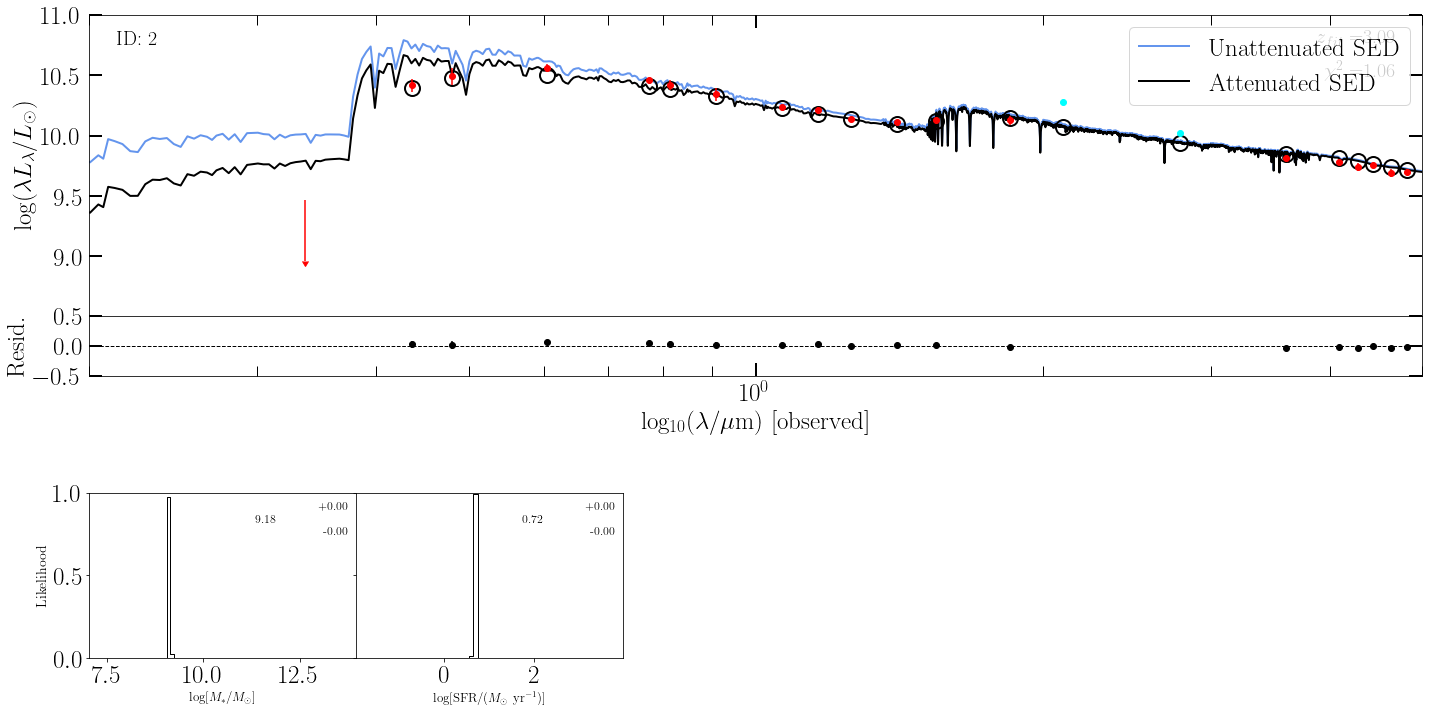

In [97]:
"""
Routine to make MAGPHYS high-z (v1; da Cunha et al. 2015) plots
Author: Andrew Battisti (Oct 2021), modified from code kindly provided by Katie Grasha and Tom Williams
"""
from __future__ import absolute_import, print_function, division
import os
import numpy as np
import astropy.units as u
from astropy.table import Table
from matplotlib.gridspec import GridSpec
#from astropy.cosmology import FlatLambdaCDM #MAGPHYS assumes FlatLambdaCDM, use same here for consistency
import matplotlib.pyplot as plt
#cosmo = FlatLambdaCDM(H0=70, Om0=0.3)


######  UPDATE THESE DIRECTORIES AND FILES  ######
# Directory where the MAGPHYS outputs are located and where figure is saved 
os.chdir(os.path.expanduser('~/Documents/lyc/'))

# Input user files
# flux_file = Table.read(os.path.expanduser('~/Documents/ZFOURGE/files/observations.dat'),format='ascii')
flux_file = Table.read(os.path.expanduser('~/notebook/Laptop/lyc-with03.csv'))
filter_file = Table.read(os.path.expanduser('~/Documents/lyc/files/filters.dat'),format='ascii')

# Adjust as desired
sed_xrange=[0.2,5e0]
sed_yrange=[8.51,11]
##################################################
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
### Plotting main sequence
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 25}
plt.rc('font', **font)

# Read in galaxy list
# galaxy_list = np.loadtxt(flux_file,dtype='str',usecols=0)
galaxy_list = flux_file['id']
# Read in filter wavelengths
# filter_wavelength = np.loadtxt(filter_file,usecols=1)
filter_wavelength=filter_file['$\lambda_c$']
### Plot first few in the list###
#for i in range(3):
### Plot entire list###
for i in range(1):#len(galaxy_list)):
    source = str(2)#galaxy_list[i])
# Read in observed fluxes, errors, redshift
    obs_flux = np.loadtxt(source+'.fit',skiprows=2,max_rows=1)
    obs_err = np.loadtxt(source+'.fit',skiprows=3,max_rows=1)
    ar_limit = np.where(((obs_flux < 0) & (obs_err > 0)) | (obs_flux/obs_err < 1))
# Only do this if limits exist    
    if ar_limit: 
        filter_wavelength_lim=filter_wavelength[ar_limit]
        obs_flux_lim=obs_err[ar_limit]
   
    ar_neg = np.where((obs_flux < 0))
    obs_flux[ar_neg] = np.nan
    ar_neg = np.where((obs_err < 0))
    obs_err[ar_neg] = np.nan
    obs_flux[ar_limit] = np.nan
    obs_err[ar_limit] = np.nan
 
    tab = np.loadtxt(source+'.fit',skiprows=8,max_rows=1,unpack=True)
    chi2 = float(tab[2])
    redshift = float(tab[3])

    magphys_flux = np.loadtxt(source+'.fit',skiprows=12,max_rows=1)
    if ar_limit: 
        magphys_flux_lim=magphys_flux[ar_limit]
        
# Read in the SED
    wavelength,attenuated_sed,unattenuated_sed = np.loadtxt(source+'.sed',skiprows=10,unpack=True)
    ar_inf = np.where(np.isinf(unattenuated_sed))
    unattenuated_sed[ar_inf] = np.nan

# Read in the PDFs
    Mstars_pdf = np.loadtxt(source+'.fit',skiprows=321,max_rows=70)
    SFR_pdf = np.loadtxt(source+'.fit',skiprows=751,max_rows=60)
#     sSFR_pdf = np.loadtxt(source+'.fit',skiprows=248,max_rows=70)
#     Ldust_pdf = np.loadtxt(source+'.fit',skiprows=384,max_rows=60)
#     Mdust_pdf = np.loadtxt(source+'.fit',skiprows=668,max_rows=60)
#     age_M_pdf = np.loadtxt(source+'.fit',skiprows=794,max_rows=50)
#     AV_pdf = np.loadtxt(source+'.fit',skiprows=1053,max_rows=80)
#     tau_V_ISM_pdf = np.loadtxt(source+'.fit',skiprows=585,max_rows=80)
#     mu_pdf = np.loadtxt(source+'.fit',skiprows=62,max_rows=20)
#     Tdust_pdf = np.loadtxt(source+'.fit',skiprows=1136,max_rows=14)

# # Read in the percentiles
    Mstars_percentile = np.loadtxt(source+'.fit',skiprows=392,max_rows=1)
    SFR_percentile = np.loadtxt(source+'.fit',skiprows=812,max_rows=1)
#     sSFR_percentile = np.loadtxt(source+'.fit',skiprows=319,max_rows=1)
#     Ldust_percentile = np.loadtxt(source+'.fit',skiprows=445,max_rows=1)
#     Mdust_percentile = np.loadtxt(source+'.fit',skiprows=729,max_rows=1)
#     age_M_percentile = np.loadtxt(source+'.fit',skiprows=845,max_rows=1)
#     AV_percentile = np.loadtxt(source+'.fit',skiprows=1134,max_rows=1)
#     tau_V_ISM_percentile = np.loadtxt(source+'.fit',skiprows=666,max_rows=1)
#     mu_percentile = np.loadtxt(source+'.fit',skiprows=83,max_rows=1)
#     Tdust_percentile = np.loadtxt(source+'.fit',skiprows=1151,max_rows=1)

# Turn redshift to luminosity distance, and then fluxes to luminosities
#     Dlum = cosmo.luminosity_distance(redshift)
#     Dlum = Dlum.value

    x = 10**wavelength                                               
    y_at = np.log10(x*10**attenuated_sed) 
    y_un = np.log10(x*10**unattenuated_sed)
    
#convert to microns
    xx=x/1.e4

#==Lnu_sun->Llam_sun==
    L_flux=np.log10((1.+redshift)*obs_flux*3e14/filter_wavelength)

    L_eflux_lo=np.log10((1.+redshift)*obs_flux*3e14/filter_wavelength)- np.log10((1.+redshift)*obs_flux*3e14/filter_wavelength-(1.+redshift)*obs_err*3e14/filter_wavelength)    
    L_eflux_hi=-np.log10((1.+redshift)*obs_flux*3e14/filter_wavelength)+ np.log10((1.+redshift)*obs_flux*3e14/filter_wavelength+(1.+redshift)*obs_err*3e14/filter_wavelength)
  
    L_pflux=np.log10((1.+redshift)*magphys_flux*3e14/filter_wavelength)
    L_pflux_diff=np.log10((1.+redshift)*obs_flux*3e14/filter_wavelength)- np.log10((1.+redshift)*magphys_flux*3e14/filter_wavelength)

    if ar_limit: 
        L_flux_lim=np.log10((1.+redshift)*obs_flux_lim*3e14/filter_wavelength_lim)
        L_pflux_diff_lim=np.log10((1.+redshift)*obs_flux_lim*3e14/filter_wavelength_lim) -np.log10((1.+redshift)*magphys_flux_lim*3e14/filter_wavelength_lim)

    
# Start plotting 
    fig = plt.figure(figsize=(20, 13)) #10 wide and 8 tall

    heights = [5, 1, 3, 3] # height of each row relative to each other

# have to set up two "gridspec", one for the top 2 rows that share x values
    gs1 = GridSpec(4,5, hspace=0, height_ratios=heights, bottom=0.2) # 4 rows, 5 columns

    ax1=fig.add_subplot(gs1[0,:]) # First row, span all columns
    ax2=fig.add_subplot(gs1[1,:], sharex=ax1) # Second row, span all columns


#second "gridspec" enviro, for the bottom 2 rows that share y values
    gs=GridSpec(4,5, wspace=0.0, height_ratios=heights) # 4 rows, 5 columns

    ax3=fig.add_subplot(gs[2,0]) # Third row, first column
    ax4=fig.add_subplot(gs[2,1]) # Third row, second column
#     ax5=fig.add_subplot(gs[2,2]) # Third row, third column
#     ax6=fig.add_subplot(gs[2,3]) # Third row, fourth column
#     ax7=fig.add_subplot(gs[2,4]) # Third row, fifth column
    
#     ax8=fig.add_subplot(gs[3,0]) # Fourth row, first column
#     ax9=fig.add_subplot(gs[3,1]) # Fourth row, second column
#     ax10=fig.add_subplot(gs[3,2]) # Fourth row, third column
#     ax11=fig.add_subplot(gs[3,3]) # Fourth row, fourth column
#     ax12=fig.add_subplot(gs[3,4]) # ThirdFourth row, fifth column


# remove the axis labels where x/y are shared
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,bottom=False,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True,bottom=False)
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=False,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=False)
    plt.setp(ax4.get_yticklabels(), visible=False)
#     plt.setp(ax5.get_yticklabels(), visible=False)
#     plt.setp(ax6.get_yticklabels(), visible=False)
#     plt.setp(ax7.get_yticklabels(), visible=False)
    
#     plt.setp(ax9.get_yticklabels(), visible=False)
#     plt.setp(ax10.get_yticklabels(), visible=False)
#     plt.setp(ax11.get_yticklabels(), visible=False)
#     plt.setp(ax12.get_yticklabels(), visible=False)
    


## plot your data
    ax1.plot(xx,y_un,c='cornflowerblue',lw=2,label='Unattenuated SED')
    ax1.plot(xx,y_at,c='black',lw=2,label='Attenuated SED')

    ax1.plot(filter_wavelength,L_pflux,c='black',ls='none',marker='o', mfc='none',ms=15, mew=2)
    
    ax1.errorbar(filter_wavelength,L_flux,
             yerr=[L_eflux_lo,L_eflux_hi],c='red',
             ls='none',marker='o',zorder=20)
    if ar_limit: 
        ax1.errorbar(filter_wavelength_lim,L_flux_lim,yerr=0.5,uplims=1,c='red',zorder=20,linestyle='none')
        
    ax1.set_xlim(sed_xrange)
    ax1.set_ylim(sed_yrange)
    ax1.set_xscale('log')

    ax2.errorbar(filter_wavelength,L_pflux_diff,
                 yerr=[L_eflux_lo,L_eflux_hi],c='black',
                 ls='none',marker='o')
    if ar_limit: 
        ax2.errorbar(filter_wavelength_lim,L_pflux_diff_lim,yerr=0.5,uplims=1,c='black',zorder=20,linestyle='none')
        for j in range(len(ar_limit)):
            ax2.arrow(filter_wavelength_lim[j],L_pflux_diff_lim[j],0,1, head_width=3, head_length=6, fc='k', ec='k')
        
    ax2.axhline(y=0, color='black', linestyle='dashed',lw=1)
    ax2.set_ylim([-0.5,0.5])

    a=np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13])
    b=np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14])

    a_e_lo=np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13])- np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13]-(1.+redshift)*3.2831797244395e-08*3e14/filter_wavelength[13])    
    a_e_hi=-np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13])+ np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13]+(1.+redshift)*3.2831797244395e-08*3e14/filter_wavelength[13])

    b_e_lo=np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14])- np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14]-(1.+redshift)*9.370986289207201e-09*3e14/filter_wavelength[14])    
    b_e_hi=-np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14])+ np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14]+(1.+redshift)*9.370986289207201e-09*3e14/filter_wavelength[14])

    a_er=np.log10((1.+redshift)*3.2831797244395e-08*3e14/filter_wavelength[13])
    b_er=np.log10((1.+redshift)*9.370986289207201e-09*3e14/filter_wavelength[14])


    ax1.errorbar([filter_wavelength[13],filter_wavelength[14]],[a,b],yerr=[[a_e_lo,b_e_lo],[a_e_hi,b_e_hi]],c='cyan',
             ls='none',marker='o',zorder=20)

    ax3.plot(Mstars_pdf[:,0],Mstars_pdf[:,1], drawstyle='steps',c='black',lw=1)
    ax3.set_xlim([7.05,13.95])
    ax3.set_ylim([0,1])
    ax4.plot(SFR_pdf[:,0],SFR_pdf[:,1], drawstyle='steps',c='black',lw=1)
    ax4.set_xlim([-1.95,3.95])
    ax4.set_ylim([0,1])
#     ax5.plot(sSFR_pdf[:,0],sSFR_pdf[:,1], drawstyle='steps',c='black',lw=1)
#     ax5.set_xlim([-12.95,-6.05])
#     ax5.set_ylim([0,1])
#     ax6.plot(Ldust_pdf[:,0],Ldust_pdf[:,1], drawstyle='steps',c='black',lw=1)
#     ax6.set_xlim([6.05,12.95])
#     ax6.set_ylim([0,1])
#     ax7.plot(Mdust_pdf[:,0],Mdust_pdf[:,1], drawstyle='steps',c='black',lw=1)
#     ax7.set_xlim([4.05,9.95])
#     ax7.set_ylim([0,1])
#     ax8.plot(age_M_pdf[:,0],age_M_pdf[:,1], drawstyle='steps',c='black',lw=1)
#     ax8.set_xlim([5.55,10.45])
#     ax8.set_ylim([0,1])
#     ax9.plot(AV_pdf[:,0],AV_pdf[:,1], drawstyle='steps',c='black',lw=1)
#     ax9.set_xlim([0.1250,19.875])
#     ax9.set_ylim([0,1])
#     ax10.plot(tau_V_ISM_pdf[:,0],tau_V_ISM_pdf[:,1], drawstyle='steps',c='black',lw=1)
#     ax10.set_xlim([0.1250,19.8750])
#     ax10.set_ylim([0,1])
#     ax11.plot(mu_pdf[:,0],mu_pdf[:,1], drawstyle='steps',c='black',lw=1)
#     ax11.set_xlim([0.025,0.975])
#     ax11.set_ylim([0,1])
#     ax12.plot(Tdust_pdf[:,0],Tdust_pdf[:,1], drawstyle='steps',c='black',lw=1)
#     ax12.set_xlim([11,80])
#     ax12.set_ylim([0,1])
    
# Output results
    ax1.text(0.02, 0.95, 'ID: '+source,
        verticalalignment='top', horizontalalignment='left',
        transform=ax1.transAxes, fontsize=20)
    ax1.text(0.98, 0.95, r'$z_{fit}=$'+'{:.2f}'.format(redshift),
        verticalalignment='top', horizontalalignment='right',
        transform=ax1.transAxes, fontsize=20)
    ax1.text(0.98, 0.85, r'$\chi^2=$'+'{:.2f}'.format(chi2),
        verticalalignment='top', horizontalalignment='right',
        transform=ax1.transAxes, fontsize=20)

    ax3.text(0.7, 0.875, '{:.2f}'.format(Mstars_percentile[2]),
        verticalalignment='top', horizontalalignment='right',
        transform=ax3.transAxes, fontsize=12)
    ax3.text(0.97, 0.95, '+{:.2f}'.format(Mstars_percentile[3]-Mstars_percentile[2]),
        verticalalignment='top', horizontalalignment='right',
        transform=ax3.transAxes, fontsize=12)
    ax3.text(0.97, 0.80, '-{:.2f}'.format(Mstars_percentile[2]-Mstars_percentile[1]),
        verticalalignment='top', horizontalalignment='right',
        transform=ax3.transAxes, fontsize=12)
    ax4.text(0.7, 0.875, '{:.2f}'.format(SFR_percentile[2]),
        verticalalignment='top', horizontalalignment='right',
        transform=ax4.transAxes, fontsize=12)
    ax4.text(0.97, 0.95, '+{:.2f}'.format(SFR_percentile[3]-SFR_percentile[2]),
        verticalalignment='top', horizontalalignment='right',
        transform=ax4.transAxes, fontsize=12)
    ax4.text(0.97, 0.80, '-{:.2f}'.format(SFR_percentile[2]-SFR_percentile[1]),
        verticalalignment='top', horizontalalignment='right',
        transform=ax4.transAxes, fontsize=12)
#     ax5.text(0.7, 0.875, '{:.2f}'.format(sSFR_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax5.transAxes, fontsize=12)
#     ax5.text(0.97, 0.95, '+{:.2f}'.format(sSFR_percentile[3]-sSFR_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax5.transAxes, fontsize=12)
#     ax5.text(0.97, 0.80, '-{:.2f}'.format(sSFR_percentile[2]-sSFR_percentile[1]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax5.transAxes, fontsize=12)
#     ax6.text(0.7, 0.875, '{:.2f}'.format(Ldust_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax6.transAxes, fontsize=12)
#     ax6.text(0.97, 0.95, '+{:.2f}'.format(Ldust_percentile[3]-Ldust_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax6.transAxes, fontsize=12)
#     ax6.text(0.97, 0.80, '-{:.2f}'.format(Ldust_percentile[2]-Ldust_percentile[1]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax6.transAxes, fontsize=12)
#     ax7.text(0.7, 0.875, '{:.2f}'.format(Mdust_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax7.transAxes, fontsize=12)
#     ax7.text(0.97, 0.95, '+{:.2f}'.format(Mdust_percentile[3]-Mdust_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax7.transAxes, fontsize=12)
#     ax7.text(0.97, 0.80, '-{:.2f}'.format(Mdust_percentile[2]-Mdust_percentile[1]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax7.transAxes, fontsize=12)
#     ax8.text(0.7, 0.875, '{:.2f}'.format(age_M_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax8.transAxes, fontsize=12)
#     ax8.text(0.97, 0.95, '+{:.2f}'.format(age_M_percentile[3]-age_M_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax8.transAxes, fontsize=12)
#     ax8.text(0.97, 0.80, '-{:.2f}'.format(age_M_percentile[2]-age_M_percentile[1]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax8.transAxes, fontsize=12)
#     ax9.text(0.7, 0.875, '{:.2f}'.format(AV_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax9.transAxes, fontsize=12)
#     ax9.text(0.97, 0.95, '+{:.2f}'.format(AV_percentile[3]-AV_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax9.transAxes, fontsize=12)
#     ax9.text(0.97, 0.80, '-{:.2f}'.format(AV_percentile[2]-AV_percentile[1]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax9.transAxes, fontsize=12)
#     ax10.text(0.7, 0.875, '{:.2f}'.format(tau_V_ISM_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax10.transAxes, fontsize=12)
#     ax10.text(0.97, 0.95, '+{:.2f}'.format(tau_V_ISM_percentile[3]-tau_V_ISM_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax10.transAxes, fontsize=12)
#     ax10.text(0.97, 0.80, '-{:.2f}'.format(tau_V_ISM_percentile[2]-tau_V_ISM_percentile[1]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax10.transAxes, fontsize=12)
#     ax11.text(0.7, 0.875, '{:.2f}'.format(mu_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax11.transAxes, fontsize=12)
#     ax11.text(0.97, 0.95, '+{:.2f}'.format(mu_percentile[3]-mu_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax11.transAxes, fontsize=12)
#     ax11.text(0.97, 0.80, '-{:.2f}'.format(mu_percentile[2]-mu_percentile[1]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax11.transAxes, fontsize=12)
#     ax12.text(0.7, 0.875, '{:.2f}'.format(Tdust_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax12.transAxes, fontsize=12)
#     ax12.text(0.97, 0.95, '+{:.2f}'.format(Tdust_percentile[3]-Tdust_percentile[2]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax12.transAxes, fontsize=12)
#     ax12.text(0.97, 0.80, '-{:.2f}'.format(Tdust_percentile[2]-Tdust_percentile[1]),
#         verticalalignment='top', horizontalalignment='right',
#         transform=ax12.transAxes, fontsize=12)

# set the x/y labels
    ax1.set_ylabel(r'$\log(\lambda L_\lambda$/$L_\odot$)')#, fontsize=18)
    ax2.set_ylabel('Resid.')#, fontsize=18)
    ax2.set_xlabel(r'log$_{10}$($\lambda$/$\mu$m) [observed]')#, fontsize=18)
    
    
#me
#     ax1.set_xlim(0,100)
    ax1.set_ylim()
#     ax2.set_xticklabels(labels=[1,.8,.9,.1,1.1,1.2,1.3,0.1,0.2,0.3,0.4,0.5,0.6,.7,.8,.9,1],minor=True)
    ax3.set_ylabel('Likelihood', fontsize=14)
    ax3.set_xlabel(r'$\log[M_*/M_\odot]$', fontsize=13)
    ax4.set_xlabel(r'$\log[$SFR$/(M_\odot$ yr$^{-1}$)]', fontsize=13)
#     ax5.set_xlabel(r'$\log[$sSFR/yr$^{-1}$]', fontsize=13)
#     ax6.set_xlabel(r'$\log[L_{dust}/L_\odot]$', fontsize=13)
#     ax7.set_xlabel(r'$\log[M_{dust}/M_\odot]$', fontsize=13)

#     ax8.set_ylabel('Likelihood', fontsize=14)
#     ax8.set_xlabel(r'$\log[Age_M$/yr]', fontsize=13)
#     ax9.set_xlabel(r'$A_V$/mag', fontsize=13)
#     ax10.set_xlabel(r"$\tau_V^{ISM}$", fontsize=13)
#     ax11.set_xlabel(r'$\mu$', fontsize=13)
#     ax12.set_xlabel(r'$T_{dust}$/K', fontsize=13)

    plt.tight_layout()
    ax1.legend()
#     plt.savefig(source+'.png')
    
print('Complete!')

In [101]:
print(ar_limit)

(array([ 0, 13, 14]),)


In [98]:
9.450E+000-9.550E+000  

-0.10000000000000142

In [99]:
4.500E-001-3.500E-001  

0.10000000000000003

In [25]:
obs_flux 1.7564503970326498e-07

array([      nan, 9.322e-06, 1.216e-05, 1.785e-05, 1.805e-05, 1.742e-05,
       1.625e-05, 1.488e-05, 1.535e-05, 1.409e-05, 1.497e-05, 1.707e-05,
       2.019e-05,       nan,       nan, 1.912e-05, 2.021e-05, 1.927e-05,
       2.066e-05, 1.864e-05, 1.969e-05])

In [26]:
105/-5.838E+03

-0.017985611510791366

In [27]:
106/-5.891E+03

-0.017993549482261076

In [28]:
5.81534189586372e-07/0.017993549482261076

3.2319036894842616e-05

In [56]:
4.2668751081190997e-07/0.017993549482261076

2.3713359681065678e-05

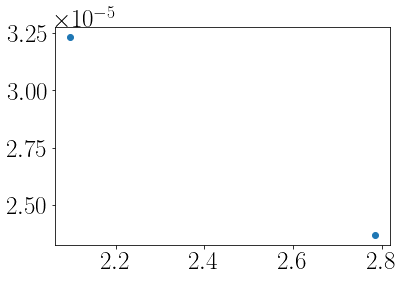

In [60]:
plt.scatter([filter_wavelength[13:15]],[3.2319036894842616e-05,2.3713359681065678e-05])

In [55]:
1.7564503970326498e-07/9.322e-06

0.01884199095722645

In [49]:
obs_flux/.values

TypeError: unsupported operand type(s) for /: 'float' and 'method'

In [23]:
L_flux

nan
10.418648774685854
10.492115525463543
10.559540558317021
10.456886595424946
10.41963194979119
10.341387223073092
10.233844688371208
10.209389403818186
10.137994390257854
10.115809628182445


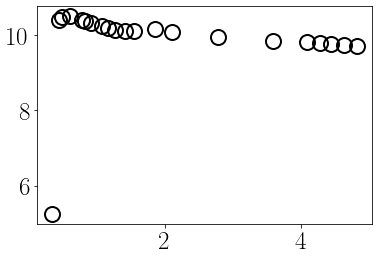

In [20]:
plt.plot(filter_wavelength,L_pflux,c='black',ls='none',marker='o', mfc='none',ms=15, mew=2)

<ErrorbarContainer object of 3 artists>

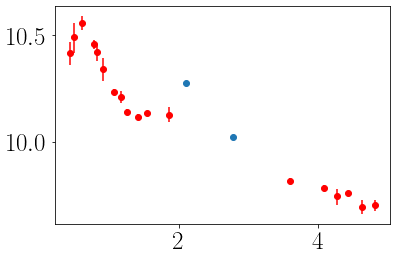

In [67]:
plt.errorbar(filter_wavelength,L_flux,
             yerr=[L_eflux_lo,L_eflux_hi],c='red',
             ls='none',marker='o',zorder=20)
a=np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13])
b=np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14])

a_e_lo=np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13])- np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13]-(1.+redshift)*3.2831797244395e-08*3e14/filter_wavelength[13])    
a_e_hi=-np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13])+ np.log10((1.+redshift)*3.2319036894842616e-05*3e14/filter_wavelength[13]+(1.+redshift)*3.2831797244395e-08*3e14/filter_wavelength[13])

b_e_lo=np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14])- np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14]-(1.+redshift)*9.370986289207201e-09*3e14/filter_wavelength[14])    
b_e_hi=-np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14])+ np.log10((1.+redshift)*2.3713359681065678e-05*3e14/filter_wavelength[14]+(1.+redshift)*9.370986289207201e-09*3e14/filter_wavelength[14])
    
a_er=np.log10((1.+redshift)*3.2831797244395e-08*3e14/filter_wavelength[13])
b_er=np.log10((1.+redshift)*9.370986289207201e-09*3e14/filter_wavelength[14])


plt.errorbar([filter_wavelength[13],filter_wavelength[14]],[a,b],yerr=[[a_e_lo,b_e_lo],[a_e_hi,b_e_hi]],fmt='o')
# yerr=[L_eflux_lo,L_eflux_hi]

In [64]:
filter_wavelength[13:15]

2.0982220000000003
2.7844640000000003


In [24]:
flux_file[1]

id,redshift,hst_wfc3_uvis_f336w,hst_wfc3_uvis_f336w*,hst_acs_f435w,hst_acs_f435w*,hst_acs_f475w,hst_acs_f475w*,hst_acs_f606w,hst_acs_f606w*,hst_acs_f775w,hst_acs_f775w*,hst_acs_f814w,hst_acs_f814w*,hst_acs_f850lp,hst_acs_f850lp*,hst_wfc3_ir_f105w,hst_wfc3_ir_f105w*,jwst_nircam_f115w,jwst_nircam_f115w*,hst_wfc3_ir_f125w,hst_wfc3_ir_f125w*,hst_wfc3_ir_f140w,hst_wfc3_ir_f140w*,hst_wfc3_ir_f160w,hst_wfc3_ir_f160w*,jwst_nircam_f182m,jwst_nircam_f182m*,jwst_nircam_f210m,jwst_nircam_f210m*,jwst_nircam_f277w,jwst_nircam_f277w*,jwst_nircam_f356w,jwst_nircam_f356w*,jwst_nircam_f410m,jwst_nircam_f410m*,jwst_nircam_f430m,jwst_nircam_f430m*,jwst_nircam_f444w,jwst_nircam_f444w*,jwst_nircam_f460m,jwst_nircam_f460m*,jwst_nircam_f480m,jwst_nircam_f480m*
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
2,3.088,6.0558161243862596e-09,1.50211028716709e-08,1.7564503970326498e-07,2.22035344861735e-08,2.2902619968750097e-07,3.65357471971077e-08,3.36357479292686e-07,2.4434903019940802e-08,3.40160785800998e-07,1.71121017299853e-08,3.2826355201972705e-07,2.99913526512894e-08,3.06182114891732e-07,3.68850666261678e-08,2.80447741167258e-07,9.2092828410982e-09,2.8925775216415497e-07,1.78022527128951e-08,2.65450393603642e-07,7.94676905524875e-09,2.8214887244830903e-07,8.298604059588341e-09,3.21610168588106e-07,9.92919849648564e-09,3.80444975526596e-07,3.0338904311892e-08,5.81534189586372e-07,3.2831797244395e-08,4.2668751081190997e-07,9.370986289207201e-09,3.6021134686114005e-07,1.16882661883575e-08,3.8077094073123e-07,1.29166777069306e-08,3.6305967398027197e-07,3.06914176446008e-08,3.8922217525056403e-07,8.743495733846421e-09,3.51151070566777e-07,2.59935989537039e-08,3.71048053665884e-07,2.3180555459941e-08
